<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/TF_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# You can read dataframes from URLs!
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [ ]:
# Start by doing the wrong thing- trying to predict the price itself
series = df['close'].values.reshape(-1, 1)
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [ ]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
series

array([-1.62500489, -1.64174953, -1.6330132 , ...,  2.2342704 ,
        2.36822751,  2.20078112])

In [ ]:
# Build the dataset
# Let's see we can use past T values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)   # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [ ]:
# Try the AutoRegressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

# train the model
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.7487 - val_loss: 1.3722
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1002 - val_loss: 0.4977
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0416 - val_loss: 0.2518
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 - val_loss: 0.1273
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - val_loss: 0.0753
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - val_loss: 0.0623
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - val_loss: 0.0587
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0615
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - val_loss: 0.0468
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - val_loss: 0.0465
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - val_loss: 0.0435
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 -

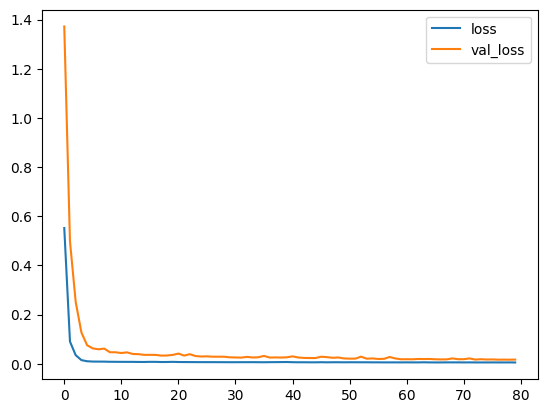

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
(1249, 1)


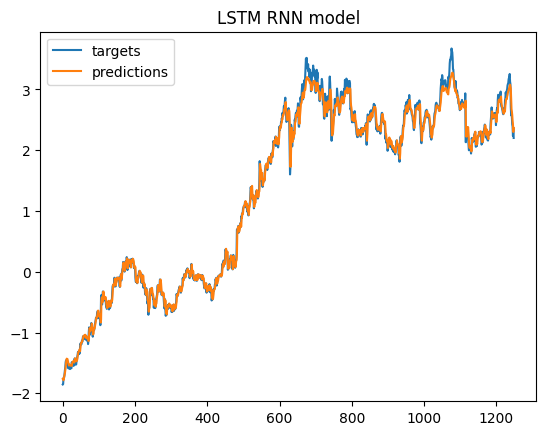

In [ ]:
# One step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('LSTM RNN model')
plt.legend();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

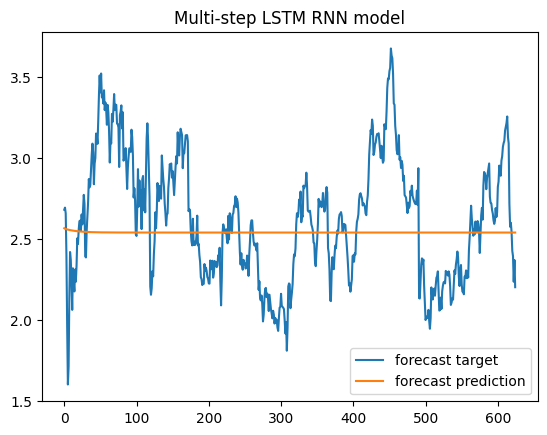

In [ ]:
#  Multi-step Forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]    # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0, 0]     # 1 x 1 array ---> scalar
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.title('Multi-step LSTM RNN model')
plt.legend();

In [ ]:
# Calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1)   # move everything up by 1
# so now it's like
# close / prevclose
# x[2] x[1]
# x[3] x[2]
# x[t] x[t-1]

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [ ]:
# then the return is
# x[t] - x[t-1] / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

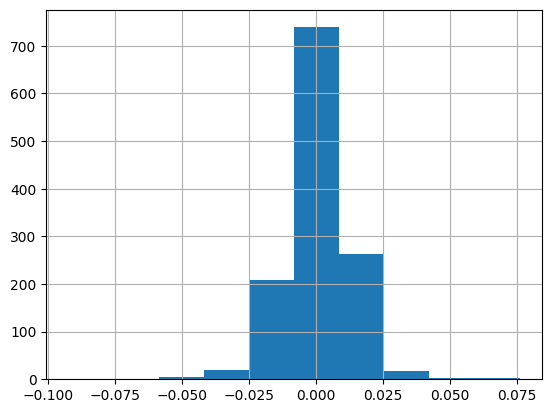

In [ ]:
# Now try an LSTM to predict returns
df['Return'].hist()

In [ ]:
series = df['Return'].values[1:].reshape(-1, 1)
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
series

array([-0.43811722,  0.08061497, -0.73536414, ..., -1.71332483,
        1.30572463, -1.82299002])

In [ ]:
# Build the dataset
# Let's see we can use past T values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)   # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [ ]:
# Try the AutoRegressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

# train the model
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.1099 - val_loss: 1.1374
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9813 - val_loss: 1.1523
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9940 - val_loss: 1.1355
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1070 - val_loss: 1.1368
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1722 - val_loss: 1.1413
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9323 - val_loss: 1.1466
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0982 - val_loss: 1.1477
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8954 - val_loss: 1.1378
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9206 - val_loss: 1.1475
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0821 - val_loss: 1.1428
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0273 - val_loss: 1.1402
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0381 - 

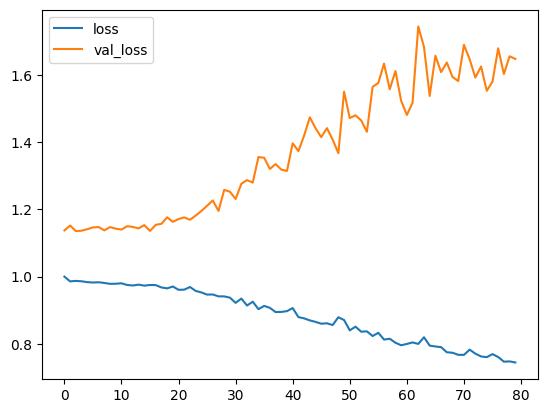

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1248, 1)


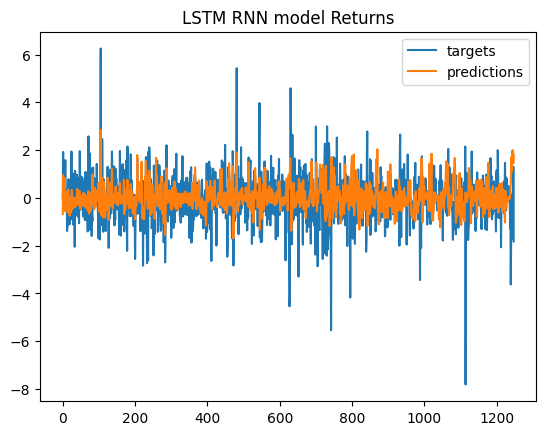

In [ ]:
# One step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('LSTM RNN model Returns')
plt.legend();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

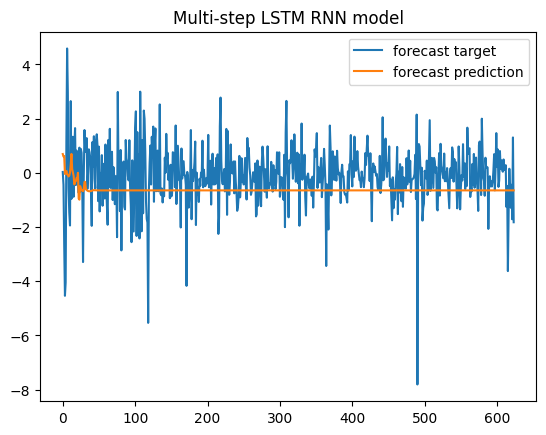

In [ ]:
#  Multi-step Forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]    # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0, 0]     # 1 x 1 array ---> scalar
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.title('Multi-step LSTM RNN model')
plt.legend();

In [ ]:
# Now turn the full data into numpy array
# Not yet in the final 'X' format!
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [ ]:
# Now make the actual data which will go into neural networks
T = 10    # Number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T

In [ ]:
# Normalize the inputs
ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:ntrain + T])
input_data = scaler.transform(input_data)

In [ ]:
# Setup X_train and y_train
X_train = np.zeros((ntrain, T, D))
y_train = np.zeros(ntrain)

for t in range(ntrain):
    X_train[t, :, :] = input_data[t:t+T]
    y_train[t] = (targets[t+T] > 0)

In [ ]:
# Setup X_test and y_test
X_test = np.zeros((N-ntrain, T, D))
y_test = np.zeros(N-ntrain)

for u in range(N-ntrain):
    # u counts from 0...(N-ntrain)
    # t counts from N-ntrain to N
    t = u + ntrain
    X_test[u, :, :] = input_data[t:t+T]
    y_test[u] = (targets[t+T] > 0)

In [ ]:
# Make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

In [ ]:
# train the model
r = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5002 - loss: 0.7036 - val_accuracy: 0.5220 - val_loss: 0.6919
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5410 - loss: 0.6914 - val_accuracy: 0.4902 - val_loss: 0.6967
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5121 - loss: 0.6915 - val_accuracy: 0.4878 - val_loss: 0.6961
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5589 - loss: 0.6862 - val_accuracy: 0.5488 - val_loss: 0.6898
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5192 - loss: 0.6909 - val_accuracy: 0.4878 - val_loss: 0.6957
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5391 - loss: 0.6905 - val_accuracy: 0.5463 - val_loss: 0.6919
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5423 - loss: 0.6895 - val_accuracy: 0.4854 - val_loss: 0.7052
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5444 - loss: 0.6862 - val_accuracy: 0.5488

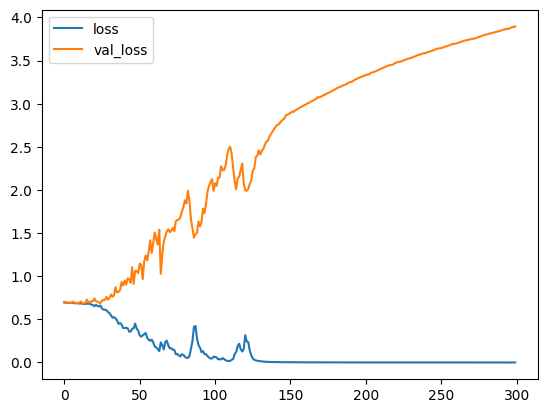

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

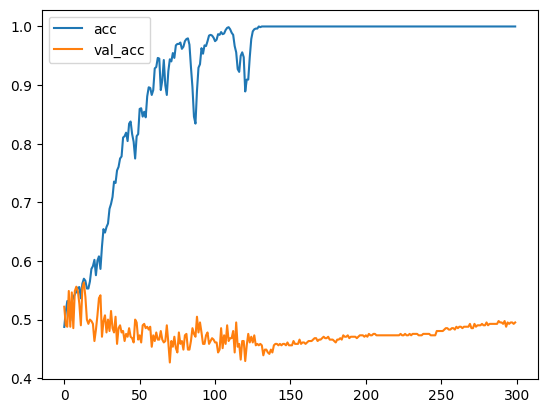

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()